<a href="https://colab.research.google.com/github/sahug/tensorflow-colab/blob/master/Tensorflow_2_0_Breast_Cancer_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 36kB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 450kB 44.4MB/s 
     |████████████████████████████████| 3.8MB 39.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=a73e2fc38d49d64d5f7ed145ce9eaaf25db6ad132eb0ad7baf1654adfe1fc5d6
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [3]:
print(tf.__version__)

2.0.0


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
cancer = datasets.load_breast_cancer()

In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
x = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
cancer.target_names #0 is malignant and 1 is benign

array(['malignant', 'benign'], dtype='<U9')

In [12]:
x.shape, y.shape

((569, 30), (569,))

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [17]:
# Converting Pandas to Numpy data to reshape the data later.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [18]:
# Reshapping the data as CNN expect 3D data and we have 2D data.
x_train = x_train.reshape(455, 30, 1)
x_test = x_test.reshape(114, 30, 1)

In [25]:
# Build Model
epochs = 50
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=2, activation="relu", input_shape=(30, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid")) # Only 1 output 0 or 1. sigmoid detects binary i.e. 0 or 1

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [26]:
# Compile the model
model.compile(optimizer=Adam(lr=0.00005), loss="binary_crossentropy", metrics=["accuracy"])

In [29]:
# Fit the model
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 2s 4ms/sample - loss: 1.0746 - accuracy: 0.5626 - val_loss: 0.6393 - val_accuracy: 0.8860
Epoch 2/50
455/455 [==============================] - 0s 413us/sample - loss: 0.7502 - accuracy: 0.6967 - val_loss: 0.5882 - val_accuracy: 0.9298
Epoch 3/50
455/455 [==============================] - 0s 412us/sample - loss: 0.6046 - accuracy: 0.7231 - val_loss: 0.5418 - val_accuracy: 0.9386
Epoch 4/50
455/455 [==============================] - 0s 420us/sample - loss: 0.3922 - accuracy: 0.8264 - val_loss: 0.5000 - val_accuracy: 0.9474
Epoch 5/50
455/455 [==============================] - 0s 419us/sample - loss: 0.4190 - accuracy: 0.8242 - val_loss: 0.4629 - val_accuracy: 0.9386
Epoch 6/50
455/455 [==============================] - 0s 425us/sample - loss: 0.3197 - accuracy: 0.8615 - val_loss: 0.4261 - val_accuracy: 0.9386
Epoch 7/50
455/455 [==============================] - 0s 422us/sample - loss: 0.

In [32]:
history.history

{'accuracy': [0.5626374,
  0.6967033,
  0.72307694,
  0.82637364,
  0.82417583,
  0.86153847,
  0.8747253,
  0.9010989,
  0.8835165,
  0.8945055,
  0.8945055,
  0.9032967,
  0.9032967,
  0.9164835,
  0.9120879,
  0.9120879,
  0.93846154,
  0.93626374,
  0.94505495,
  0.92747253,
  0.94065934,
  0.92967033,
  0.93186814,
  0.94505495,
  0.94725275,
  0.92967033,
  0.94945055,
  0.95164835,
  0.93626374,
  0.94945055,
  0.93626374,
  0.94285715,
  0.94945055,
  0.93846154,
  0.95824176,
  0.95164835,
  0.95384616,
  0.94945055,
  0.95604396,
  0.95164835,
  0.96043956,
  0.96263736,
  0.95164835,
  0.96703297,
  0.96043956,
  0.96263736,
  0.95824176,
  0.94945055,
  0.96483517,
  0.94945055],
 'loss': [1.0746016433278283,
  0.750186915057046,
  0.60459648672041,
  0.3921999868455824,
  0.41904686309479094,
  0.3196970467711543,
  0.3122818783089355,
  0.23563446650629516,
  0.26194468292888706,
  0.27070075841722907,
  0.26573202125318757,
  0.21134017682992495,
  0.23099034941130941,
 

In [30]:
epoch_range = range(1, epochs+1)

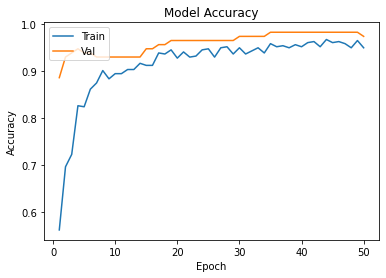

In [31]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

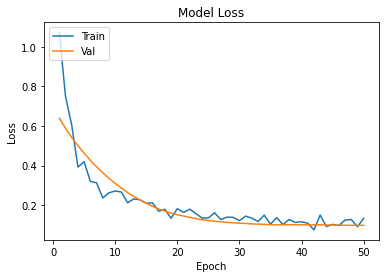

In [33]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()